<a href="https://colab.research.google.com/github/KUNALDEBNATH/projects/blob/main/kmeans_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

In [ ]:
#Data collection and analysis
h = pd.read_csv('/content/heart.csv', header=0)

In [ ]:
h.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
h['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
X=h.drop(columns='target',axis=1)
Y=h['target']

In [ ]:
print(X)
print(Y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(X,Y,test_size=0.33, random_state=42)

In [ ]:
X_test.shape

(339, 13)

In [ ]:
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
#model.fit(X_train)
# assign a cluster to each example
yhat = model.predict(X)
#yhat = model.predict(X_test)
# retrieve unique clusters
clusters = unique(yhat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
yhat

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

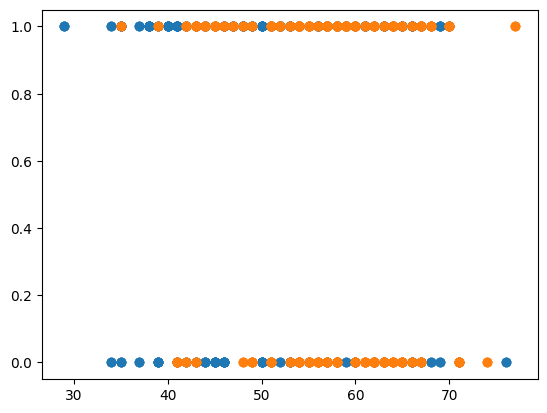

In [ ]:
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_indices = where(yhat == cluster)[0]
    # create scatter of these samples
    pyplot.scatter(X.iloc[row_indices, 0], X.iloc[row_indices, 1])

# show the plot
pyplot.show()